### Iraj Ghufran
### Domain: Data Science & Business Analytics 

# Customer Prediction for Startups Using Unsupervised ML

## importing libraries

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Reading Data

In [4]:
df = pd.read_csv ('Data-1.csv')
df.head()

,Location,Gender,Product
0,"Hyderabad, Sindh",Female,UnStitched Female Clothes
1,Rahim Yar Khan,Female,UnStitched Female Clothes
2,"Dammam, Saudi Arabia",Male,UnStitched Female Clothes
3,"Lahore, Pakistan",Female,UnStitched Female Clothes
4,"Rawalpindi, Pakistan",Female,UnStitched Female Clothes


## Performing Label Encoding

In [8]:
df_sklearn = df.copy()

from sklearn.preprocessing import LabelEncoder

lbl_encode = LabelEncoder()

df_sklearn['location_code'] = lbl_encode.fit_transform(df['Location'])
df_sklearn['gender_code'] = lbl_encode.fit_transform(df['Gender'])
df_sklearn['product_code'] = lbl_encode.fit_transform(df['Product'])

df_sklearn.head()

df_sklearn.to_csv (r'C:\Users\Iraj\Internship\Untitled Folder\data-label-encoded.csv', index = False, header=True)


,Location,Gender,Product,location_code,gender_code,product_code
0,"Hyderabad, Sindh",Female,UnStitched Female Clothes,135,0,14
1,Rahim Yar Khan,Female,UnStitched Female Clothes,303,0,14
2,"Dammam, Saudi Arabia",Male,UnStitched Female Clothes,80,1,14
3,"Lahore, Pakistan",Female,UnStitched Female Clothes,200,0,14
4,"Rawalpindi, Pakistan",Female,UnStitched Female Clothes,312,0,14


## Visualizing the data

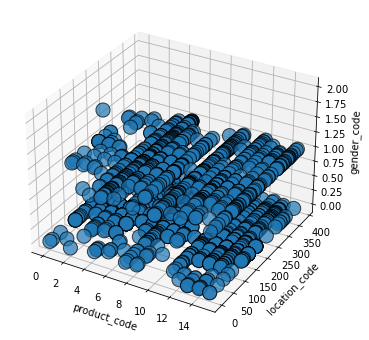

In [10]:
df = pd.read_csv ('data-label-encoded.csv')

x = df['product_code']
y = df['location_code']
z = df['gender_code']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidths=1, alpha=.7, edgecolor='k', s = 200)

ax.set_xlabel("product_code")
ax.set_ylabel("location_code")
ax.set_zlabel("gender_code")

plt.show()

## Findingout the number of clusters by "The Elbow Method"

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['product_code','location_code', 'gender_code']])
    sse.append(km.inertia_)

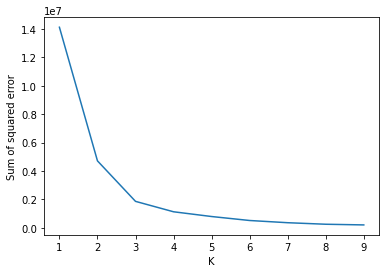

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Applying K-Means Clustering

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['product_code','location_code', 'gender_code']])
y_predicted

array([0, 1, 2, ..., 2, 2, 0])

In [14]:
df['cluster']=y_predicted
df.head()

,Location,Gender,Product,location_code,gender_code,product_code,cluster
0,"Hyderabad, Sindh",Female,UnStitched Female Clothes,135,0,14,0
1,Rahim Yar Khan,Female,UnStitched Female Clothes,303,0,14,1
2,"Dammam, Saudi Arabia",Male,UnStitched Female Clothes,80,1,14,2
3,"Lahore, Pakistan",Female,UnStitched Female Clothes,200,0,14,0
4,"Rawalpindi, Pakistan",Female,UnStitched Female Clothes,312,0,14,1


In [15]:
km.cluster_centers_

array([[  8.4770259 , 174.74018379,   0.38262322],
       [  8.79411765, 306.66078431,   0.51764706],
       [  8.80160858,  73.91957105,   0.59785523]])

## Visualizing the Clusters

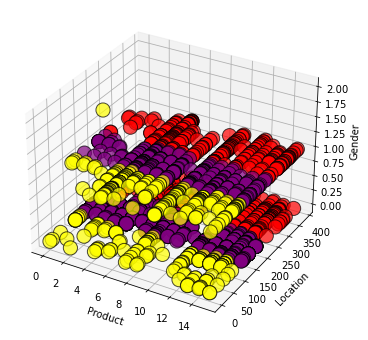

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['product_code'], df1['location_code'], df1['gender_code'], linewidths=1, alpha=.7, edgecolor='k', s = 200, c='purple')
ax.scatter(df2['product_code'], df2['location_code'], df2['gender_code'], linewidths=1, alpha=.7, edgecolor='k', s = 200, c='red')
ax.scatter(df3['product_code'], df3['location_code'], df3['gender_code'], linewidths=1, alpha=.7, edgecolor='k', s = 200, c='yellow')

ax.set_xlabel("Product")
ax.set_ylabel("Location")
ax.set_zlabel("Gender")

plt.show()

In [17]:
df1

,Location,Gender,Product,location_code,gender_code,product_code,cluster
0,"Hyderabad, Sindh",Female,UnStitched Female Clothes,135,0,14,0
3,"Lahore, Pakistan",Female,UnStitched Female Clothes,200,0,14,0
5,"Lahore, Pakistan",Female,UnStitched Female Clothes,200,0,14,0
8,"Jhang Sadar, Punjab, Pakistan",Male,UnStitched Female Clothes,151,1,14,0
10,"Karachi, Pakistan",Female,UnStitched Female Clothes,166,0,14,0
...,...,...,...,...,...,...,...
2071,"Karachi, Pakistan",Female,Formalwear Female,166,0,7,0
2073,"Lahore, Pakistan",Female,Formalwear Female,200,0,7,0
2074,"Lahore, Pakistan",Female,Formalwear Female,200,0,7,0
2075,"Lahore, Pakistan",Female,Formalwear Female,200,0,7,0


In [18]:
df2

,Location,Gender,Product,location_code,gender_code,product_code,cluster
1,Rahim Yar Khan,Female,UnStitched Female Clothes,303,0,14,1
4,"Rawalpindi, Pakistan",Female,UnStitched Female Clothes,312,0,14,1
16,"Quetta, Pakistan",Female,UnStitched Female Clothes,302,0,14,1
19,Rahim Yar Khan,Male,UnStitched Female Clothes,303,1,14,1
22,"New Delhi, India",Male,UnStitched Female Clothes,266,1,14,1
...,...,...,...,...,...,...,...
2065,"Okara, Pakistan",Female,Formalwear Female,275,0,7,1
2066,"Rawalpindi, Pakistan",Male,Formalwear Female,312,1,7,1
2067,Multan,Female,Formalwear Female,248,0,7,1
2072,Rahim Yar Khan,Female,Formalwear Female,303,0,7,1


In [19]:
df3

,Location,Gender,Product,location_code,gender_code,product_code,cluster
2,"Dammam, Saudi Arabia",Male,UnStitched Female Clothes,80,1,14,2
6,"Gujranwala, Pakistan",Female,UnStitched Female Clothes,108,0,14,2
7,Bahawalpur,Female,UnStitched Female Clothes,32,0,14,2
9,"Dubai, United Arab Emirates",Male,UnStitched Female Clothes,93,1,14,2
15,Faisalabad,Female,UnStitched Female Clothes,99,0,14,2
...,...,...,...,...,...,...,...
2045,Faisalabad,Female,Formalwear Female,99,0,7,2
2051,"Chakwal, Pakistan",Female,Formalwear Female,59,0,7,2
2063,"Gujranwala, Pakistan",Female,Formalwear Female,108,0,7,2
2077,"Al Hillah, Babil, Iraq",Female,Formalwear Female,11,0,7,2
